<a href="https://colab.research.google.com/github/Farhan5559/PRODIGY_DS_5/blob/main/PRODIGY_DS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upload the Dataset**

In [21]:
# Import the necessary libraries for loading the data
import kagglehub
import pandas as pd
import os
print("Getting the dataset path from Kaggle...")
dataset_dir_path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print(f"Dataset files are located in: {dataset_dir_path}")

csv_file_name = 'US_Accidents_March23.csv'
full_csv_path = os.path.join(dataset_dir_path, csv_file_name)

print(f"\nLoading the CSV file: {full_csv_path}")
print("\n✅ Dataset successfully loaded!")
print("Displaying the first 5 rows to confirm:")
display(df.head())

Getting the dataset path from Kaggle...
Dataset files are located in: /kaggle/input/us-accidents

Loading the CSV file: /kaggle/input/us-accidents/US_Accidents_March23.csv

✅ Dataset successfully loaded!
Displaying the first 5 rows to confirm:


,Severity,Start_Time,Start_Lat,Start_Lng,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Hour
0,3,2016-02-08 05:46:00,39.865147,-84.058723,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,5
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,6
2,2,2016-02-08 06:49:27,39.063148,-84.032608,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,6
3,3,2016-02-08 07:23:34,39.747753,-84.205582,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,7
4,2,2016-02-08 07:39:07,39.627781,-84.188354,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,7


**Data Cleaning **

In [5]:
# Show missing values
missing = df.isnull().sum() / len(df) * 100
missing[missing > 0].sort_values(ascending=False)


,0
Weather_Condition,2.244438


In [6]:
# Drop columns with >40% missing data
df = df.dropna(thresh=len(df) * 0.6, axis=1)
df = df.drop_duplicates()


**Basic EDA – Time of Day**

<Axes: title={'center': 'Accidents by Hour of Day'}, xlabel='Hour'>

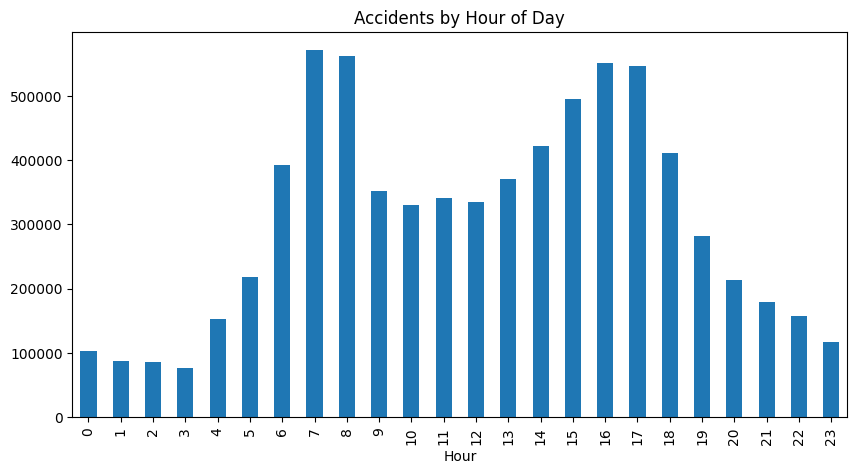

In [7]:
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract hour and plot
df['Hour'] = df['Start_Time'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Accidents by Hour of Day')


**Weather Conditions & Road Impact**

Plotting the Top 10 Weather Conditions...


/tmp/ipython-input-4171005053.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Weather_Condition', order=top_10_weather, palette='viridis')


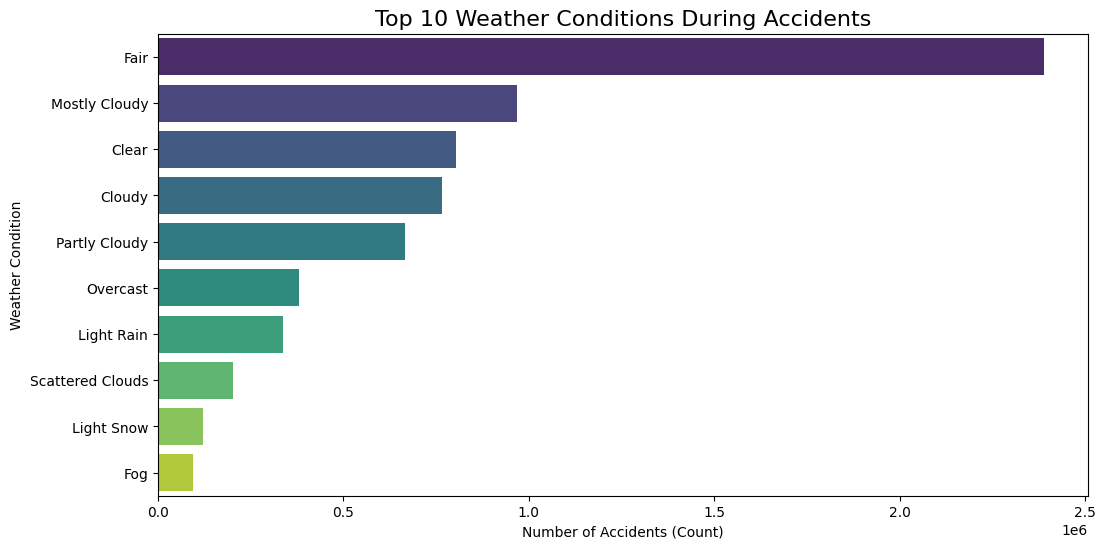

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

if 'Weather_Condition' in df:
    print("Plotting the Top 10 Weather Conditions...")
    plt.figure(figsize=(12, 6))

    # Get the top 10 most frequent weather conditions
    top_10_weather = df['Weather_Condition'].value_counts().nlargest(10).index

    sns.countplot(data=df, y='Weather_Condition', order=top_10_weather, palette='viridis')

    plt.title('Top 10 Weather Conditions During Accidents', fontsize=16)
    plt.xlabel('Number of Accidents (Count)')
    plt.ylabel('Weather Condition')
    plt.show()
else:
    print("Error: 'Weather_Condition' column not found.")

**Accident Hotspots (Latitude/Longitude)**

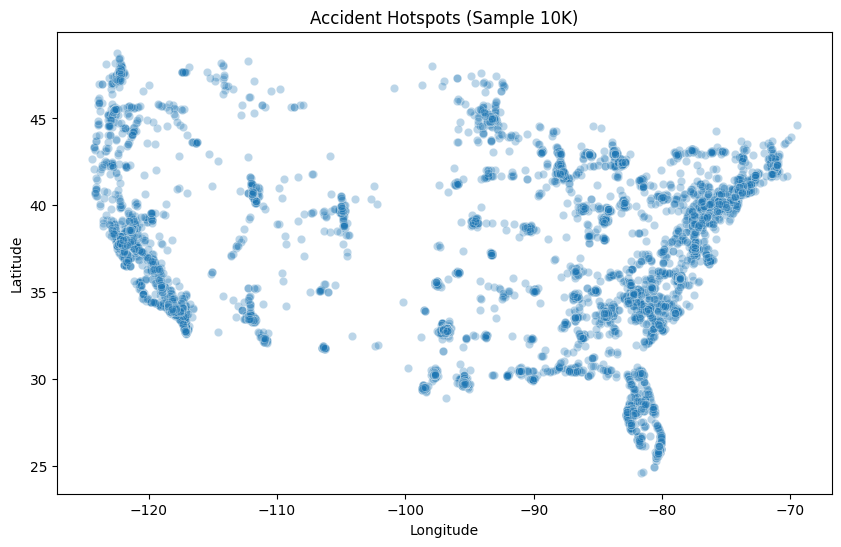

In [11]:
# Scatter plot of accident locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df.sample(10000), alpha=0.3)
plt.title('Accident Hotspots (Sample 10K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
